# Libraries and Global Settings

In [1]:
import pandas as pd  # work with Pandas dataframes
from matplotlib import pyplot as plt
import seaborn as sb
from scipy import stats

from sklearn import preprocessing

from keras import layers
from keras.models import Sequential
from keras.layers.core import Dense, Activation, Dropout
from keras.optimizers import RMSprop

import warnings # Funktionalität zur Unterdrückung von Warnungen
warnings.filterwarnings('ignore')

Using TensorFlow backend.


In [2]:
#!pip install pandas_profiling

In [3]:
%%html
<style>
table {float:left}
</style>

# Importing Data

Fist of all we import the data which were generated in the whole preprocess (`df_for_ML`).

In [4]:
dateparse = lambda x: pd.datetime.strptime(x, '%Y-%m-%d')

In [5]:
df_for_ML = pd.read_csv('df_for_ML.csv', parse_dates=['Datum'], date_parser=dateparse)

In [6]:
df_for_ML.Datum[0]

Timestamp('2000-01-01 00:00:00')

In [7]:
df_for_ML.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7458 entries, 0 to 7457
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Datum         7458 non-null   datetime64[ns]
 1   Temp          7458 non-null   float64       
 2   WG            7458 non-null   float64       
 3   WR            7458 non-null   float64       
 4   Druck         7458 non-null   float64       
 5   NO            7458 non-null   float64       
 6   NO2           7458 non-null   float64       
 7   Niederschlag  7458 non-null   float64       
 8   PM10          7458 non-null   float64       
dtypes: datetime64[ns](1), float64(8)
memory usage: 524.5 KB


In [8]:
df_for_ML=df_for_ML.sort_values(by=['Datum'], axis=0, ascending=True)
df_for_ML

,Datum,Temp,WG,WR,Druck,NO,NO2,Niederschlag,PM10
0,2000-01-01,3.718,1.959896,234.922917,991.80,17.6266,24.236,3.5892,11.3772
1,2000-01-02,3.848,2.172912,222.511250,996.90,14.2886,28.698,3.5212,12.3972
2,2000-01-03,1.463,2.295208,220.181250,996.20,19.0638,35.336,0.8398,19.9480
3,2000-01-04,4.934,3.574979,220.885417,989.90,8.2660,24.210,1.4894,11.4780
4,2000-01-05,6.917,2.237208,220.554167,989.70,11.3496,26.208,4.3200,12.9260
...,...,...,...,...,...,...,...,...,...
7452,2020-05-27,17.300,1.700000,212.000000,1000.09,6.1000,21.700,0.0000,12.1060
7453,2020-05-28,17.300,2.400000,28.000000,996.45,4.2000,23.500,0.0000,13.9400
7454,2020-05-29,16.200,2.200000,129.000000,993.43,2.8000,18.700,0.0000,21.6300
7455,2020-05-30,15.900,2.400000,27.000000,989.46,2.4000,18.400,0.0000,13.1080


In [9]:
type(df_for_ML.Datum[0])

pandas._libs.tslibs.timestamps.Timestamp

In [10]:
df_for_ML.describe()

,Temp,WG,WR,Druck,NO,NO2,Niederschlag,PM10
count,7458.000000,7458.000000,7458.000000,7458.000000,7458.000000,7458.000000,7458.000000,7458.000000
mean,12.037186,1.972305,194.088486,984.913948,17.660555,33.409431,1.290489,19.127094
std,7.414490,0.692115,61.491858,7.461863,16.387746,15.528238,2.570995,9.034226
min,-11.430000,0.600000,9.000000,966.762500,0.047220,0.000000,0.000000,0.000000
25%,6.259250,1.500000,153.713579,980.585000,5.287000,22.260000,0.000000,12.481200
50%,12.205000,1.800000,211.071147,985.400000,11.165000,31.175000,0.060000,17.310000
75%,17.730000,2.300000,234.489428,989.800000,24.995000,42.510000,1.270000,24.133000
max,31.460000,4.166604,359.700000,1003.622500,54.557000,81.970000,11.500000,41.610700


# Modeling

## Data Preparation

Definition of Sampling Rates

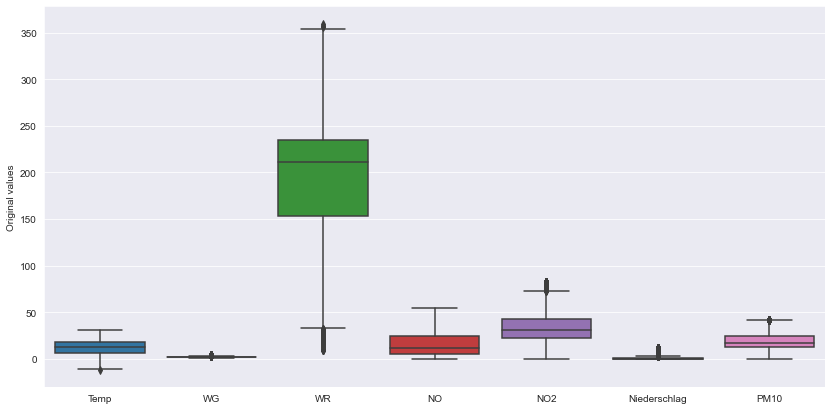

In [13]:
plt.figure(figsize=(14,7))
sb.set_style("darkgrid")
sb.boxplot(data=df_for_ML.drop(columns=["Datum","Druck"]))
#plt.title("Distribution of normalized temperature, humidity and windspeed")
plt.ylabel("Original values")
plt.show()

### Data Scaling and Normalization

#### Data Preparation

In [14]:
type(df_for_ML.Datum[0])

pandas._libs.tslibs.timestamps.Timestamp

#### Data Normalization

In [15]:
df_for_ML_woDate = df_for_ML.drop('Datum', axis=1)
x = df_for_ML_woDate.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df_for_ML_norm = pd.DataFrame(x_scaled)

In [16]:
df_for_ML_norm.head()

,0,1,2,3,4,5,6,7
0,0.353183,0.381286,0.644206,0.679259,0.322500,0.295669,0.312104,0.273420
1,0.356214,0.441011,0.608815,0.817621,0.261263,0.350104,0.306191,0.297933
2,0.300606,0.475300,0.602171,0.798630,0.348865,0.431085,0.073026,0.479396
3,0.381534,0.834121,0.604179,0.627713,0.150776,0.295352,0.129513,0.275843
4,0.427769,0.459038,0.603234,0.622287,0.207346,0.319727,0.375652,0.310641


In [17]:
i = 0
dictColumn = {}
for i in range(0,(len(df_for_ML_woDate.columns))):
    dictColumn.update({list(df_for_ML_norm.columns)[i]:list(df_for_ML_woDate.columns)[i]})
    i=i+1
dictColumn

{0: 'Temp',
 1: 'WG',
 2: 'WR',
 3: 'Druck',
 4: 'NO',
 5: 'NO2',
 6: 'Niederschlag',
 7: 'PM10'}

In [18]:
df_for_ML_norm=df_for_ML_norm.rename(columns=dictColumn)


In [19]:
df_for_ML_Date = df_for_ML[['Datum']]

In [20]:
df_for_ML_norm = pd.concat([df_for_ML_Date, df_for_ML_norm], axis=1, sort=False)

In [21]:
df_for_ML_norm.head()

,Datum,Temp,WG,WR,Druck,NO,NO2,Niederschlag,PM10
0,2000-01-01,0.353183,0.381286,0.644206,0.679259,0.322500,0.295669,0.312104,0.273420
1,2000-01-02,0.356214,0.441011,0.608815,0.817621,0.261263,0.350104,0.306191,0.297933
2,2000-01-03,0.300606,0.475300,0.602171,0.798630,0.348865,0.431085,0.073026,0.479396
3,2000-01-04,0.381534,0.834121,0.604179,0.627713,0.150776,0.295352,0.129513,0.275843
4,2000-01-05,0.427769,0.459038,0.603234,0.622287,0.207346,0.319727,0.375652,0.310641


In [22]:
df_for_ML_norm.describe()

,Temp,WG,WR,Druck,NO,NO2,Niederschlag,PM10
count,7458.000000,7458.000000,7458.000000,7458.000000,7458.000000,7458.000000,7458.000000,7458.000000
mean,0.547148,0.384765,0.527769,0.492443,0.323122,0.407581,0.112216,0.459668
std,0.172872,0.194054,0.175340,0.202438,0.300639,0.189438,0.223565,0.217113
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.412433,0.252341,0.412642,0.375000,0.096126,0.271563,0.000000,0.299952
50%,0.551061,0.336454,0.576194,0.505629,0.203959,0.380322,0.005217,0.415999
75%,0.679879,0.476644,0.642970,0.625000,0.457675,0.518604,0.110435,0.579971
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


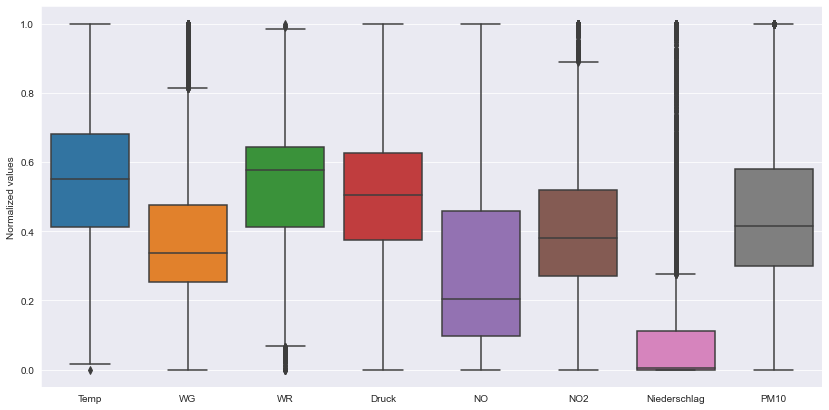

In [23]:
plt.figure(figsize=(14,7))
sb.set_style("darkgrid")
sb.boxplot(data=df_for_ML_norm.drop(columns=["Datum"]))
#plt.title("Distribution of normalized temperature, humidity and windspeed")
plt.ylabel("Normalized values")
plt.show()

### Split Data

#### Split Data into Training and Validation Samples

In [24]:
df_train=df_for_ML_norm[df_for_ML_norm["Datum"]<="2015-12-31"]
df_test=df_for_ML_norm[df_for_ML_norm["Datum"]>"2015-12-31"]


In [25]:
df_train.tail()

,Datum,Temp,WG,WR,Druck,NO,NO2,Niederschlag,PM10
5840,2015-12-27,0.443693,0.140189,0.574850,0.744749,0.995285,0.452605,0.000000,0.377307
5841,2015-12-28,0.399394,0.196265,0.577702,0.694232,1.000000,0.569721,0.011304,0.456613
5842,2015-12-29,0.369084,0.196265,0.036784,0.672957,1.000000,0.577040,0.011304,0.475839
5843,2015-12-30,0.359758,0.196265,0.331908,0.657392,1.000000,0.480664,0.006957,0.552742
5844,2015-12-31,0.376078,0.056076,0.559738,0.556334,1.000000,0.441625,0.109565,0.636855


In [26]:
df_test.iloc[-1,:].Datum

Timestamp('2016-01-29 00:00:00')

In [27]:
df_test.tail()

,Datum,Temp,WG,WR,Druck,NO,NO2,Niederschlag,PM10
7453,2020-05-28,0.669853,0.308417,0.578842,0.904164,0.111040,0.264731,0.0,0.290935
7454,2020-05-29,0.669853,0.504682,0.054177,0.805412,0.076184,0.286690,0.0,0.335010
7455,2020-05-30,0.644206,0.448606,0.342173,0.723481,0.050501,0.228132,0.0,0.519818
7456,2020-05-31,0.637211,0.504682,0.051326,0.615776,0.043163,0.224472,0.0,0.315015
7457,2016-01-29,0.655864,0.392530,0.148275,0.583492,0.028486,0.158595,0.0,0.278342


def create_dataset(X, y, time_steps=1, step=1):
    Xs, ys = [], []
    for i in range(0, len(X) - time_steps, step):
        v = X.iloc[i:(i + time_steps)].values
        labels = y.iloc[i: i + time_steps]
        Xs.append(v)        
        ys.append(stats.mode(labels)[0][0])
    return np.array(Xs), np.array(ys).reshape(-1, 1)

In [28]:
df_test=df_test.drop(columns=["Datum"])
df_train=df_train.drop(columns=["Datum"])

#### Split Data into Input and Target Data

In [29]:
def create_dataset(X, y, time_steps=1, step=1):
    Xs, ys = [], []
    for i in range(0, len(X) - time_steps, step):
        v = X.iloc[i:(i + time_steps)].values
        labels = y.iloc[i+time_steps]
        Xs.append(v)        
        ys.append(labels)
    return np.array(Xs), np.array(ys)

In [30]:
TIME_STEPS = 21
STEP = 1

X_train, y_train = create_dataset(
    #df_train.drop(columns=['PM10']), 
    df_train,
    df_train.PM10, 
    TIME_STEPS, 
    STEP
)

X_test, y_test = create_dataset(
    #df_test.drop(columns=['PM10']),
    df_test,
    df_test.PM10, 
    TIME_STEPS, 
    STEP
)

In [31]:
df_for_ML_norm.head(3)

,Datum,Temp,WG,WR,Druck,NO,NO2,Niederschlag,PM10
0,2000-01-01,0.353183,0.381286,0.644206,0.679259,0.322500,0.295669,0.312104,0.273420
1,2000-01-02,0.356214,0.441011,0.608815,0.817621,0.261263,0.350104,0.306191,0.297933
2,2000-01-03,0.300606,0.475300,0.602171,0.798630,0.348865,0.431085,0.073026,0.479396


In [32]:
X_train[0]

array([[0.35318256, 0.38128589, 0.64420564, 0.67925936, 0.32249956,
        0.29566915, 0.31210435, 0.27342006],
       [0.35621357, 0.44101123, 0.60881451, 0.81762073, 0.26126284,
        0.3501037 , 0.3061913 , 0.29793298],
       [0.3006062 , 0.47530038, 0.60217066, 0.79862995, 0.34886547,
        0.43108454, 0.07302609, 0.47939592],
       [0.38153416, 0.83412093, 0.60417855, 0.62771297, 0.15077625,
        0.29535196, 0.12951304, 0.27584251],
       [0.42776871, 0.45903842, 0.60323401, 0.62228703, 0.20734591,
        0.31972673, 0.37565217, 0.31064125],
       [0.35845185, 0.39205243, 0.56948246, 0.60329626, 0.3271446 ,
        0.43069416, 0.00966957, 0.38711197],
       [0.41352297, 0.3138659 , 0.53128802, 0.66840749, 0.33973316,
        0.39221666, 0.23843478, 0.42822159],
       [0.42228958, 0.32124219, 0.58958571, 0.6331389 , 0.50249295,
        0.46346224, 0.01546087, 0.46853333],
       [0.4003031 , 0.22793098, 0.33499192, 0.62771297, 0.8363413 ,
        0.46338904, 0.001043

In [33]:
type(df_train["PM10"].iloc[2])

numpy.float64

In [34]:
X_train.shape

(5824, 21, 8)

In [35]:
y_train.shape

(5824,)

In [36]:
df_for_ML_norm.tail(3)

,Datum,Temp,WG,WR,Druck,NO,NO2,Niederschlag,PM10
7455,2020-05-30,0.644206,0.448606,0.342173,0.723481,0.050501,0.228132,0.0,0.519818
7456,2020-05-31,0.637211,0.504682,0.051326,0.615776,0.043163,0.224472,0.0,0.315015
7457,2016-01-29,0.655864,0.392530,0.148275,0.583492,0.028486,0.158595,0.0,0.278342


In [37]:
X_test[-1]

array([[0.71881557, 0.42056812, 0.57313944, 0.22212425, 0.03398986,
        0.17567403, 0.12173913, 0.55461696],
       [0.52529727, 0.47664387, 0.92956943, 0.15945469, 0.05050066,
        0.20251311, 1.        , 0.29603443],
       [0.46467708, 0.30841662, 0.57313944, 0.49070808, 0.10737119,
        0.20617299, 0.        , 0.29410704],
       [0.48332945, 0.25234087, 0.28799544, 0.34719208, 0.10920572,
        0.28181042, 0.4       , 0.53505469],
       [0.52762882, 0.30841662, 0.07984032, 0.42017092, 0.06884599,
        0.25985117, 0.06956522, 0.36990486],
       [0.58358592, 0.44860599, 0.570288  , 0.49260716, 0.03215533,
        0.20861291, 0.        , 0.24176474],
       [0.59058055, 0.25234087, 0.59309952, 0.61252035, 0.0578388 ,
        0.24277175, 0.        , 0.27973574],
       [0.6185591 , 0.30841662, 0.59595096, 0.63992132, 0.02665173,
        0.18421374, 0.        , 0.22590343],
       [0.66519002, 0.33645449, 0.57313944, 0.67518991, 0.06150786,
        0.264731  , 0.      

In [38]:
y_test[-1]

0.2783418687981697

## Alogrithms Selection

## Baseline Models

## Deep Learning Models

In [39]:
X_train.shape

(5824, 21, 8)

In [40]:
print(X_train.shape)
print(y_train.shape)

(5824, 21, 8)
(5824,)


In [41]:
print(X_train.ndim)
print(y_train.ndim)

3
1


In [42]:
print(X_train.dtype)
print(y_train.dtype)

float64
float64


In [43]:
X_train.shape[1]

21

In [44]:
X_train.shape[0], X_train.shape[1], X_train.shape[2]

(5824, 21, 8)

In [45]:
model = Sequential()
model.add(layers.LSTM(units=200, 
                      return_sequences= True,
                      activation ='tanh', 
                      input_shape=(X_train.shape[1],X_train.shape[2])))
model.add(layers.Flatten())
model.add(layers.Dense(1))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 21, 200)           167200    
_________________________________________________________________
flatten_1 (Flatten)          (None, 4200)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 4201      
Total params: 171,401
Trainable params: 171,401
Non-trainable params: 0
_________________________________________________________________


In [46]:
y_train.reshape(-1,1)

array([[0.27122831],
       [0.31504397],
       [0.83834206],
       ...,
       [0.47583915],
       [0.55274244],
       [0.63685542]])

In [47]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(5824, 21, 8)
(5824,)
(1592, 21, 8)
(1592,)


In [48]:
model.compile(optimizer='RMSprop', loss='mse',metrics=["accuracy"])
history = model.fit(x=X_train, y=y_train, epochs=15, validation_data=(X_test, y_test))

Train on 5824 samples, validate on 1592 samples
Epoch 1/15
5824/5824 [==============================] - 4s 748us/step - loss: 0.0443 - accuracy: 0.0325 - val_loss: 0.0279 - val_accuracy: 0.0094
Epoch 2/15
5824/5824 [==============================] - 4s 698us/step - loss: 0.0284 - accuracy: 0.0381 - val_loss: 0.0197 - val_accuracy: 0.0138
Epoch 3/15
5824/5824 [==============================] - 4s 760us/step - loss: 0.0261 - accuracy: 0.0388 - val_loss: 0.0195 - val_accuracy: 0.0126
Epoch 4/15
5824/5824 [==============================] - 5s 928us/step - loss: 0.0251 - accuracy: 0.0386 - val_loss: 0.0200 - val_accuracy: 0.0132
Epoch 5/15
5824/5824 [==============================] - 6s 985us/step - loss: 0.0248 - accuracy: 0.0388 - val_loss: 0.0266 - val_accuracy: 0.0138
Epoch 6/15
5824/5824 [==============================] - 6s 951us/step - loss: 0.0242 - accuracy: 0.0393 - val_loss: 0.0209 - val_accuracy: 0.0138
Epoch 7/15
5824/5824 [==============================] - 5s 927us/step - loss

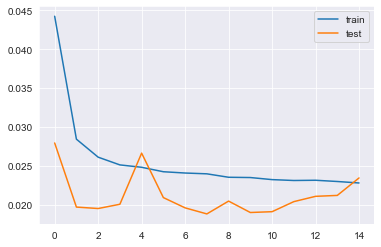

In [49]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

## Hyperparamters Optimization

## Evaluation

### Model Evaluation (Performance)

#### Training Phase

#### Testing Phase

# Projekt Evaluation

# Deployment

In the first phase of CRISP the overall business-case, which shall be supported by the data mining process must be clearly defined and understood. Then the goal of the data mining project itself must be defined. This includes the specification of metrics for measuring the performance of the data mining project.

In the second phase data must be gathered, accessed, understood and described. Quantitiy and qualitity of the data must be assessed on a high-level.

In the third phase data must be investigated and understood more thoroughly. Common means for understanding data are e.g. visualization and the calculation of simple statistics. Outliers must be detected and processed, sampling rates must be determined, features must be selected and eventually be transformed to other formats.

In the modelling phase various algorithms and their hyperparameters are selected and applied. Their performance on the given data is determined in the evaluation phase.

The output of the evaluation is usually fed back to the first phases (business- and data-understanding). Applying this feedback the techniques in the overall process are adapted and optimized. Usually only after several iterations of this process the evaluation yields good results and the project can be deployed.